In [11]:
# case 1: init by assignment

from google.cloud import vision

YOUR_SERVICE = 'gcpai.json'

client = vision.ImageAnnotatorClient.from_service_account_json(YOUR_SERVICE)

In [12]:
# case 1: one-shot upload

YOUR_PIC = 'some_plate.jpg'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [13]:
# 设置语言提示
image_context = vision.ImageContext(
    language_hints=['en']  # 假设车牌使用英文字符
)

In [14]:
response = client.text_detection(image=image, image_context=image_context)

In [54]:
response

text_annotations {
  locale: "und"
  description: "1961 QU\nWiThunks-\n200%\nA\n3\n2969-8988\nSir\n#107\n4583\n32-462967-5777\nARD\nLIRI2257-8-33"
  bounding_poly {
    vertices {
      x: 750
      y: 1082
    }
    vertices {
      x: 2581
      y: 1082
    }
    vertices {
      x: 2581
      y: 3399
    }
    vertices {
      x: 750
      y: 3399
    }
  }
}
text_annotations {
  description: "1961"
  bounding_poly {
    vertices {
      x: 785
      y: 3206
    }
    vertices {
      x: 952
      y: 3265
    }
    vertices {
      x: 917
      y: 3365
    }
    vertices {
      x: 750
      y: 3306
    }
  }
}
text_annotations {
  description: "QU"
  bounding_poly {
    vertices {
      x: 945
      y: 3263
    }
    vertices {
      x: 1048
      y: 3299
    }
    vertices {
      x: 1013
      y: 3398
    }
    vertices {
      x: 910
      y: 3362
    }
  }
}
text_annotations {
  description: "WiThunks"
  bounding_poly {
    vertices {
      x: 1686
      y: 1082
    }
    verti

Detected license plate number: 1961 QU


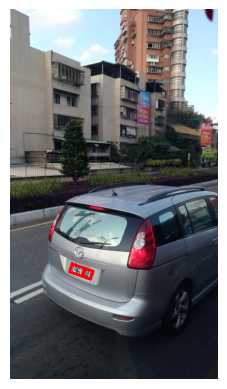

In [58]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# 打开图片
im = Image.open(YOUR_PIC)
plt.imshow(im)

if len(response.text_annotations) > 2:
    # 初始化一个空字符串来收集车牌号码的各个部分
    license_plate_number = ""

    # 只处理前两个文本标签（跳过整个图像的描述，即第一个text_annotation）
    for i in range(1, 3):
        # 提取每个文本标签的描述并追加到车牌号码字符串
        text = response.text_annotations[i].description
        license_plate_number += text + " "  # 添加一个空格作为文本间的分隔符

        # 提取每个文本标签的边界框
        vertices = response.text_annotations[i].bounding_poly.vertices
        a = [(vertex.x, vertex.y) for vertex in vertices]
        a.append(a[0])  # 闭合多边形
        x, y = zip(*a)
        plt.plot(x, y, color='red', linewidth=2)

    # 打印完整的车牌号码
    print("Detected license plate number:", license_plate_number.strip())

plt.axis('off')  # 不显示坐标轴
plt.show()